In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import csv
times = []
counts = []
meanCurrent = []
with open('OctopoleFillingData_10_04_24(Sheet1).csv', mode ='r')as file:
  csvFile = csv.reader(file,delimiter = ';')
  next(csvFile)
  for lines in csvFile:
        times.append(float(lines[0]))
        counts.append(float(lines[1]))
        meanCurrent.append(0.5*(float(lines[3])+float(lines[4])))
    

[1.         1.         0.5        0.6        1.         1.
 1.         1.         1.         1.         1.         0.96
 0.92307692 0.92307692 0.96       1.         1.         0.92307692
 0.82758621 0.82758621 0.85714286 0.8        0.88888889 1.
 1.         1.         1.         1.         0.96       0.92307692
 0.96       1.         0.96       1.         0.96      ]


Text(0, 0.5, 'Counts per shot')

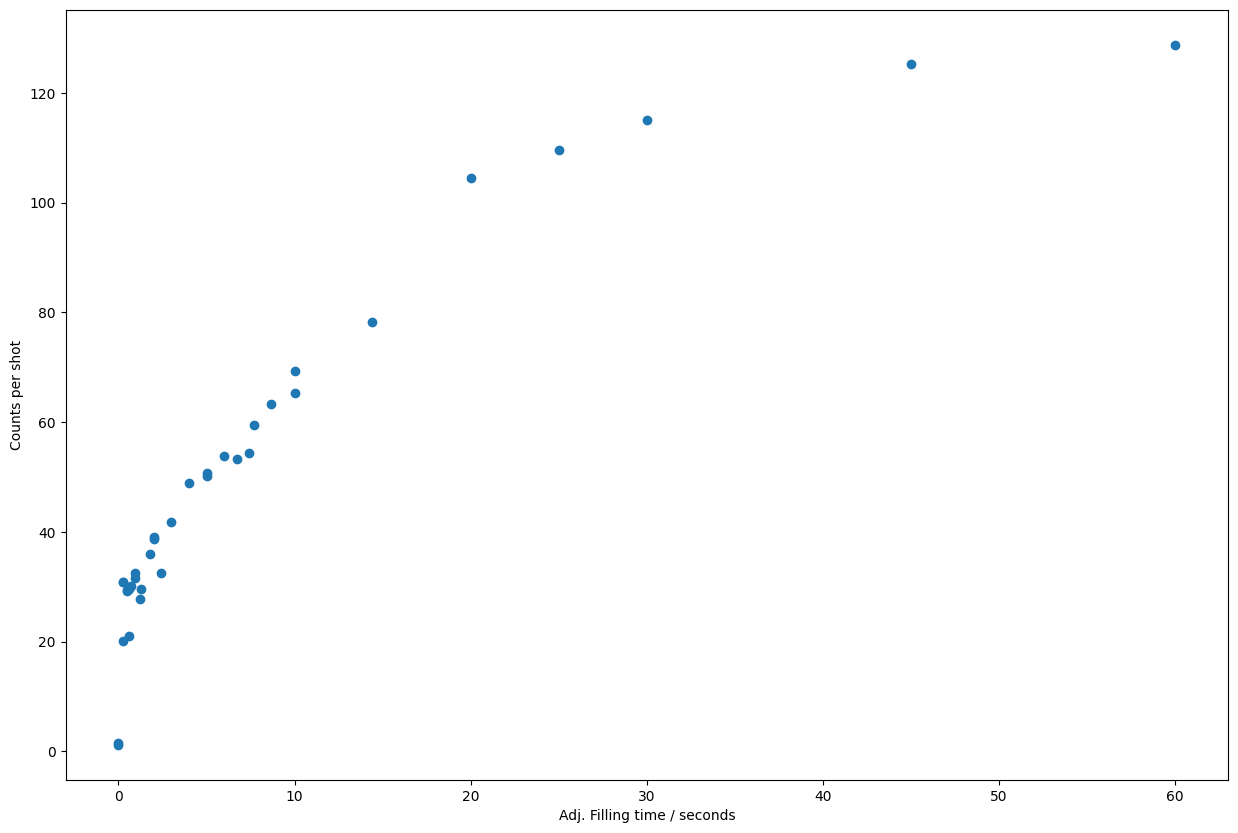

In [7]:
fig,ax = plt.subplots(figsize = (15,10))
adjustmentFactor = meanCurrent[0]/(np.array(meanCurrent))
ax.scatter(times*adjustmentFactor,np.array(counts)/20*adjustmentFactor)
#ax.errorbar(times*adjustmentFactor,np.array(counts)/20*adjustmentFactor,np.sqrt(counts)*adjustmentFactor/20,ls = '')
print(adjustmentFactor)
ax.set_xlabel('Adj. Filling time / seconds')
ax.set_ylabel('Counts per shot')

Let's load in the older data as well.

In [ ]:
times2  =[]
counts2 = []
meanCurrent2 = []


with open('OctopoleFillingData_10_04_24(Sheet1).csv', mode ='r')as file:
  csvFile2 = csv.reader(file,delimiter = ';')
  next(csvFile)
  for lines in csvFile:
        times.append(float(lines[0]))
        counts.append(float(lines[1]))
        meanCurrent.append(0.5*(float(lines[2])+float(lines[3])))